In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# mnist 데이터셋 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

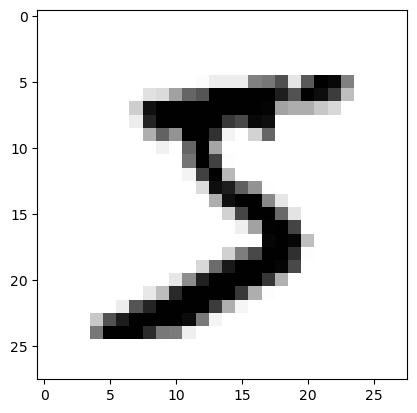

In [4]:
plt.imshow(x_train[0], cmap = "gray_r")
plt.show()

In [5]:
y_train[0]

5

In [15]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
scaled_train = x_train.reshape(-1, 28, 28, 1) / 255
scaled_test = x_test.reshape(-1, 28, 28, 1) / 255

# 합성곱 신경망 설정

In [7]:
model = keras.Sequential()

In [8]:
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = "relu",
                              input_shape = (28, 28, 1)))

In [9]:
model.add(keras.layers.MaxPool2D(2))

In [10]:
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = "relu"))

In [11]:
model.add(keras.layers.MaxPool2D(2))

In [12]:
model.add(keras.layers.Flatten())

In [13]:
model.add(keras.layers.Dense(100, activation = "relu"))

In [14]:
model.add(keras.layers.Dropout(0.4))

In [16]:
model.add(keras.layers.Dense(10, activation = "softmax"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 100)               1

In [18]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam",
              metrics = ["accuracy"])

In [19]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

In [20]:
history = model.fit(scaled_train, y_train, validation_split = 0.2, epochs = 30,
                    callbacks = [early_stopping_cb])

Epoch 1/30


1500/1500 [==============================] - 23s 14ms/step - loss: 0.2314 - accuracy: 0.9289 - val_loss: 0.0603 - val_accuracy: 0.9818
Epoch 2/30
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0834 - accuracy: 0.9748 - val_loss: 0.0450 - val_accuracy: 0.9870
Epoch 3/30
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0596 - accuracy: 0.9820 - val_loss: 0.0432 - val_accuracy: 0.9865
Epoch 4/30
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0478 - accuracy: 0.9859 - val_loss: 0.0397 - val_accuracy: 0.9885
Epoch 5/30
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0403 - accuracy: 0.9877 - val_loss: 0.0387 - val_accuracy: 0.9892
Epoch 6/30
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0334 - accuracy: 0.9894 - val_loss: 0.0454 - val_accuracy: 0.9891
Epoch 7/30
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0293 - accuracy: 0.9905 - val_loss: 0.0353

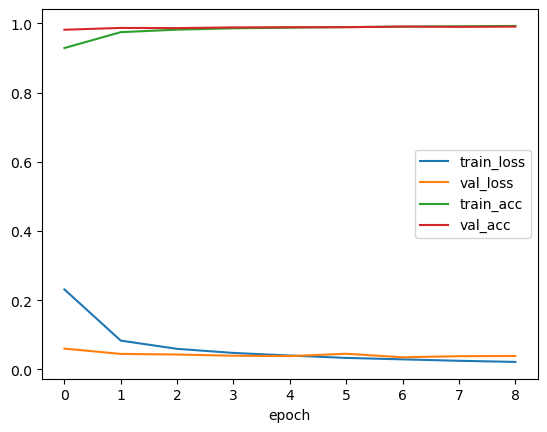

In [21]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.xlabel("epoch")
plt.legend()
plt.show()

In [22]:
model.evaluate(scaled_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0251 - accuracy: 0.9913


[0.02510988898575306, 0.9912999868392944]

In [23]:
preds = model.predict(scaled_test)

313/313 [==============================] - 2s 5ms/step


In [24]:
preds.shape

(10000, 10)

In [26]:
preds[0]

array([1.9936074e-14, 2.1044198e-11, 2.7825259e-08, 1.0683121e-08,
       1.5014206e-12, 2.1812223e-13, 8.9928698e-19, 1.0000000e+00,
       4.8836621e-12, 1.8575425e-09], dtype=float32)

In [28]:
pred_arr = np.argmax(preds, axis = 1)

In [29]:
x_match = []

for idx, item in enumerate(pred_arr):
    if item != y_test[idx]:
        x_match.append(idx)

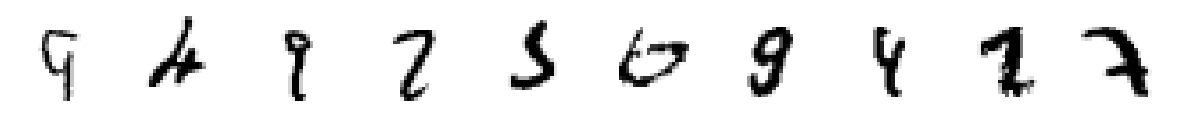

In [30]:
fig, axs = plt.subplots(1, 10, figsize = (15, 15))

for i, item in enumerate(x_match[:10]):
    axs[i].imshow(x_test[item], cmap = "gray_r")
    axs[i].axis("off")
plt.show()

In [31]:
y_test[x_match[:10]]

array([9, 4, 9, 2, 5, 6, 9, 4, 2, 7], dtype=uint8)